<h1 style="font-size: 50px; text-align: center; color:Yellow; background-color:red; padding:25px; border:2px solid black">IPL Analysis</h1>

<p><b>All data is taken from <a href="https://codebasics.io/challenges/codebasics-resume-project-challenge/13">Code Basics</a> </b></p>

<hr>
<h1>Data Exploration</h1>
<hr>

**Datasets:**
- dim_players.csv
- dim_match_summary.csv
- fact_bating_summary.csv
- fact_bowling_summary.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_players = pd.read_csv("./datasets/dim_players.csv")
df_players

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter
...,...,...,...,...,...
287,AbishekPorel,Capitals,Left hand Bat,Not Available,Wicketkeeper Batter
288,SisandaMagala,Super Kings,Right hand Bat,Right arm Fast medium,Bowler
289,MohitRathee,Punjab Kings,Right hand Bat,Legbreak,Allrounder
290,RajvardhanHangargekar,Super Kings,Right hand Bat,Right arm Fast medium,Bowling Allrounder


In [3]:
df_players.team.unique()

array(['Super Kings', 'KKR', 'Capitals', 'RCB', 'Mumbai', 'Sunrisers',
       'Royals', 'Punjab Kings', 'Titans', 'Super Giants'], dtype=object)

In [4]:
# Player count by teams
df_players.team.value_counts()

team
Mumbai          39
Punjab Kings    38
Sunrisers       35
KKR             35
Royals          33
RCB             30
Capitals        29
Super Kings     28
Titans          13
Super Giants    12
Name: count, dtype: int64

In [5]:
# player count by role
df_players.playingRole.value_counts()

playingRole
Bowler                 117
Allrounder              41
Wicketkeeper Batter     29
Top order Batter        27
Bowling Allrounder      23
Batting Allrounder      19
Middle order Batter     13
Batter                  12
Opening Batter          11
Name: count, dtype: int64

In [6]:
df_players.isnull().sum()

name            0
team            0
battingStyle    0
bowlingStyle    0
playingRole     0
dtype: int64

Reading remaining datasets

In [7]:
df_match_summary =  pd.read_csv("./datasets/dim_match_summary.csv")
df_fact_bating =  pd.read_csv("./datasets/fact_bating_summary.csv")
df_fact_bowling =  pd.read_csv("./datasets/fact_bowling_summary.csv")

In [8]:
df_match_summary.head(3)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597


In [9]:
df_match_summary.shape

(206, 6)

In [10]:
type(df_match_summary.matchDate[0])

str

In [11]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [12]:
df_match_summary.isna().sum()

team1        0
team2        0
winner       0
margin       0
matchDate    0
match_id     0
dtype: int64

In [13]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [14]:
df_fact_bating.shape

(3268, 11)

In [15]:
df_fact_bating.isna().sum()

match_id       0
match          0
teamInnings    0
battingPos     0
batsmanName    0
out/not_out    0
runs           0
balls          0
4s             0
6s             0
SR             0
dtype: int64

In [16]:
df_fact_bating["out/not_out"].value_counts()

out/not_out
out        2527
not_out     741
Name: count, dtype: int64

In [17]:
df_fact_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [18]:
df_fact_bowling.shape

(2436, 14)

In [19]:
df_fact_bowling.overs.unique()

array([3. , 4. , 1. , 3.5, 1.4, 3.4, 2. , 3.1, 2.2, 2.1, 2.3, 2.4, 0.1,
       3.3, 1.1, 2.5, 3.2, 1.5, 1.3, 0.3, 0.2, 1.2, 0.5])

In [20]:
df_fact_bowling.isna().sum()

match_id       0
match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
dtype: int64

<hr>
<h1>Data Cleaning</h1>
<hr>

In [31]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [33]:
df_match_summary.matchDate.replace("May 28-29, 2023","May 28, 2023", inplace=True)

In [34]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [35]:
type(df_match_summary.matchDate[0])

str

In [36]:
df_match_summary.matchDate = pd.to_datetime(df_match_summary.matchDate, format="%b %d, %Y" )

In [37]:
type(df_match_summary.matchDate[0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942


<hr>
<h1>Data Transformation</h1>
<hr>

In [27]:
df_fact_bating["out/not_out"].value_counts()

out/not_out
out        2527
not_out     741
Name: count, dtype: int64

In [28]:
def out_counts(value):
    if isinstance(value,str) and value == "out":
        return 1
    else:
        return 0

In [29]:
df_fact_bating["outs"] = df_fact_bating["out/not_out"].apply(out_counts)
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


<hr>
<h1>Insight Generation</h1>
<hr>

<h2 style="color:red">Primary Analysis</h2>

In [21]:
# Presets
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

<h3>1. Top 10 batsmen based on past 3 years total runs scored.</h3>

In [22]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [23]:
df_fact_bating[df_fact_bating.batsmanName == "RuturajGaikwad"].runs.sum()

np.int64(1593)

In [24]:
top_runs = df_fact_bating.groupby("batsmanName")["runs"].sum().sort_values(ascending = False)

top_runs = top_runs.head(10)
top_runs

batsmanName
ShubmanGill        1851
FafduPlessis       1831
RuturajGaikwad     1593
KLRahul            1516
JosButtler         1509
ShikharDhawan      1392
ViratKohli         1385
SanjuSamson        1304
SuryakumarYadav    1225
GlennMaxwell       1214
Name: runs, dtype: int64

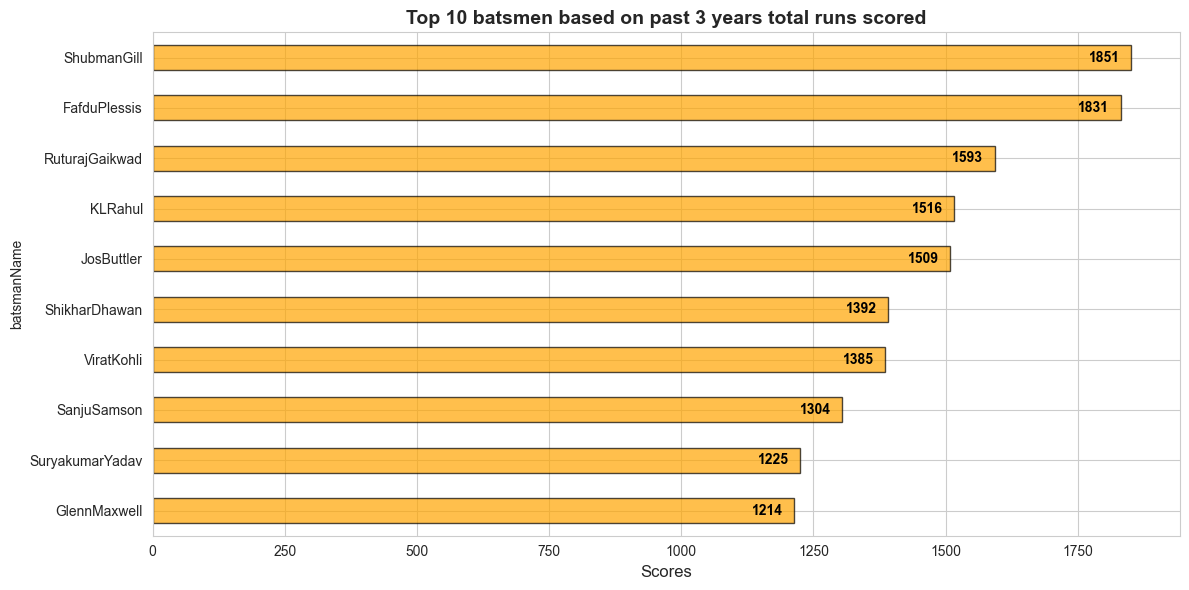

In [25]:
ax = top_runs.sort_values().plot(kind="barh", color="orange", edgecolor="black", alpha=0.7 )

# Titles and labels
plt.title("Top 10 batsmen based on past 3 years total runs scored", fontsize=14, weight='bold')
plt.xlabel("Scores", fontsize=12)

# Annotate scores on bars
for i, v in enumerate(top_runs.sort_values()):
    ax.text(
        v-80 ,  # Small gap from bar end
        i,      # y position (index of bar)
        str(v),
        color='black',
        va='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

# Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)


In [26]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
